#  Unit 1



# Fixed strategy optimization

In [1]:
from fish import fish
env = fish()

In [5]:
import numpy as np
# A simple agent
class some_agent:
    def __init__(self, effort):
        self.effort = effort

    def predict(self, obs, **kwargs):
        return self.effort, {}



In [6]:
from skopt import gp_minimize, gbrt_minimize
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process
from utils import simulate


def g(x):
    agent = some_agent(x)
    def my_function(i):
        np.random.seed(i)
        df, mu = simulate(agent, env, timeseries=False)
        return mu
        
    results = [my_function(i) for i in range(100)]
    return -np.mean(results)



In [7]:
%%time
# look for actions between [-1,1] for each species.
res = gp_minimize(g, [(-1.0, 1.0)], n_calls = 50, verbose=False, n_jobs=-1)
res.fun, res.x

CPU times: user 12min 13s, sys: 1.99 s, total: 12min 15s
Wall time: 5min 25s


(-229.80220673861027, [0.24958444582458994])

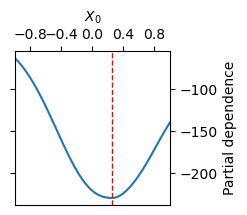

In [8]:
import matplotlib.pyplot as plt

ax = plot_objective(res)

plt.show()

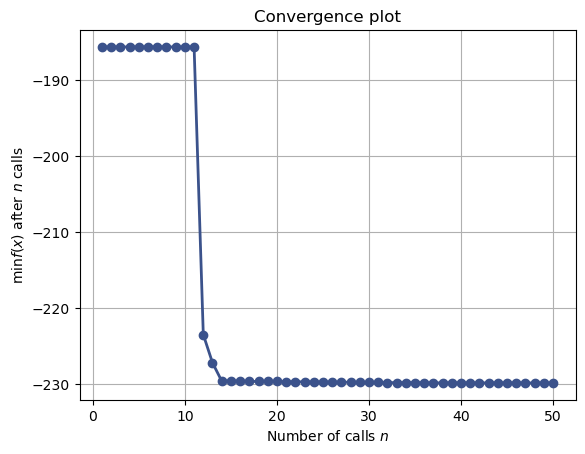

In [9]:

ax2 = plot_convergence(res)

plt.show()

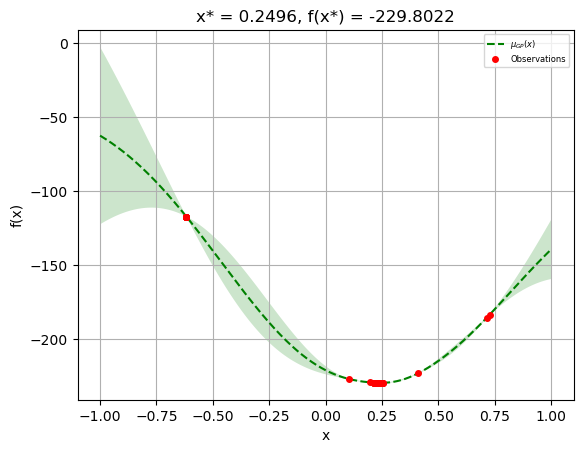

In [10]:

ax2 = plot_gaussian_process(res)

plt.show()